In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

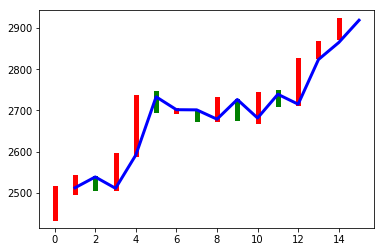

In [3]:
# 日期数据 一共15天
date = np.linspace(1,15,15)
# 收盘价格
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
# 开盘价格
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
# print(date)
plt.figure()
# 用for-loop绘制15天数据
for i in range(0,15):
    # 柱状图
    # 日期数据
    dateOne = np.zeros([2])
    dateOne[0] = i
    dateOne[1] = i
    # 价格数据
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    # 若当天收盘价大于开盘价则股票上涨，用红色标注，不然为股票下跌，用绿色标注
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne,priceOne,'r',lw=5)
    else:
        plt.plot(dateOne,priceOne,'g',lw=5)
# 绘制相应的柱状图
# plt.show()
# 实现人工神经网络（ANN）
# 为了便于计算，将日期归一化
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
# i从0到14
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0
# 输入层：N行1列 x为日期，y为价格
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
# 隐藏层
# w1为1*10d的随机变量矩阵，矩阵中的值介于0,1之间
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
# 激活函数
layer1 = tf.nn.relu(wb1)
# 输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
# 损失函数 (y - predict)^2 即标准差
loss = tf.reduce_mean(tf.square(y - layer2))
# 采用梯度下降法调整权重矩阵和偏移矩阵
# 调整的步长
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 训练10000次
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    # 通过训练好的模型做出预测
    predict = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        # 之前已经归一化过，故要乘3000
        predPrice[i,0] = (predict*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=3)
plt.show()

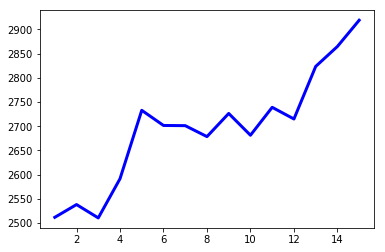

In [7]:
# 实现人工神经网络（ANN）
# 为了便于计算，将日期归一化
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
# i从0到14
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0
# 输入层：N行1列 x为日期，y为价格
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
# 隐藏层
# w1为1*10d的随机变量矩阵，矩阵中的值介于0,1之间
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
# 激活函数
layer1 = tf.nn.relu(wb1)
# 输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
# 损失函数 (y - predict)^2 即标准差
loss = tf.reduce_mean(tf.square(y - layer2))
# 采用梯度下降法调整权重矩阵和偏移矩阵
# 调整的步长
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 训练10000次
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    # 通过训练好的模型做出预测
    predict = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        # 之前已经归一化过，故要乘3000
        predPrice[i,0] = (predict*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=3)
plt.show()